In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from scipy.stats import skew


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV files

case_data_4Yrs = pd.read_csv('2yrs_Case_Data.csv')
control_data_4Yrs = pd.read_csv('2yrs_Control_Data.csv')

In [3]:
# Check the number of unique PATID values in each DataFrame
print("Number of unique PATID values in case_data:", case_data['PATID'].nunique())
print("Number of unique PATID values in control_data:", control_data['PATID'].nunique())


Number of unique PATID values in case_data: 3095
Number of unique PATID values in control_data: 119723


In [4]:
# Concatenate the two datasets along the rows
data = pd.concat([case_data, control_data], ignore_index=True)

# Print the combined DataFrame info to verify the changes
print(data.info())

# Print the first few rows to check the result
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122818 entries, 0 to 122817
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PATID           122818 non-null  int64  
 1   Sex             122818 non-null  object 
 2   Race            122813 non-null  object 
 3   Marital_Status  122806 non-null  object 
 4   Max_DBP         122773 non-null  float64
 5   Max_SBP         122786 non-null  float64
 6   Min_DBP         122773 non-null  float64
 7   Min_SBP         122786 non-null  float64
 8   Comorbidities   122324 non-null  object 
 9   Smoking_Status  122521 non-null  object 
 10  Encounter Type  122818 non-null  object 
 11  Age_Grp         122818 non-null  object 
 12  Target          122818 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 12.2+ MB
None
     PATID Sex   Race Marital_Status  Max_DBP  Max_SBP  Min_DBP  Min_SBP  \
0   578908   M  WHITE        Married     78.0    164.0 

In [5]:
# Find the number of missing values per column
data.isnull().sum(axis=0)
print(data.isnull().sum(axis=0))

PATID               0
Sex                 0
Race                5
Marital_Status     12
Max_DBP            45
Max_SBP            32
Min_DBP            45
Min_SBP            32
Comorbidities     494
Smoking_Status    297
Encounter Type      0
Age_Grp             0
Target              0
dtype: int64


# Check for Symmetry and skewness to decide whether to use the mean, median or mode for imputing missing values in numerical data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122818 entries, 0 to 122817
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PATID           122818 non-null  int64  
 1   Sex             122818 non-null  object 
 2   Race            122813 non-null  object 
 3   Marital_Status  122806 non-null  object 
 4   Max_DBP         122773 non-null  float64
 5   Max_SBP         122786 non-null  float64
 6   Min_DBP         122773 non-null  float64
 7   Min_SBP         122786 non-null  float64
 8   Comorbidities   122324 non-null  object 
 9   Smoking_Status  122521 non-null  object 
 10  Encounter Type  122818 non-null  object 
 11  Age_Grp         122818 non-null  object 
 12  Target          122818 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 12.2+ MB


In [7]:
# Check the number of missing values in each column
missing_values_after_imputation = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values_after_imputation / len(data)) * 100

# Print the number of missing values and their percentage
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values_after_imputation,
    'Percentage Missing': percentage_missing
})


print(missing_data_summary)

                Missing Values  Percentage Missing
PATID                        0            0.000000
Sex                          0            0.000000
Race                         5            0.004071
Marital_Status              12            0.009771
Max_DBP                     45            0.036640
Max_SBP                     32            0.026055
Min_DBP                     45            0.036640
Min_SBP                     32            0.026055
Comorbidities              494            0.402221
Smoking_Status             297            0.241821
Encounter Type               0            0.000000
Age_Grp                      0            0.000000
Target                       0            0.000000


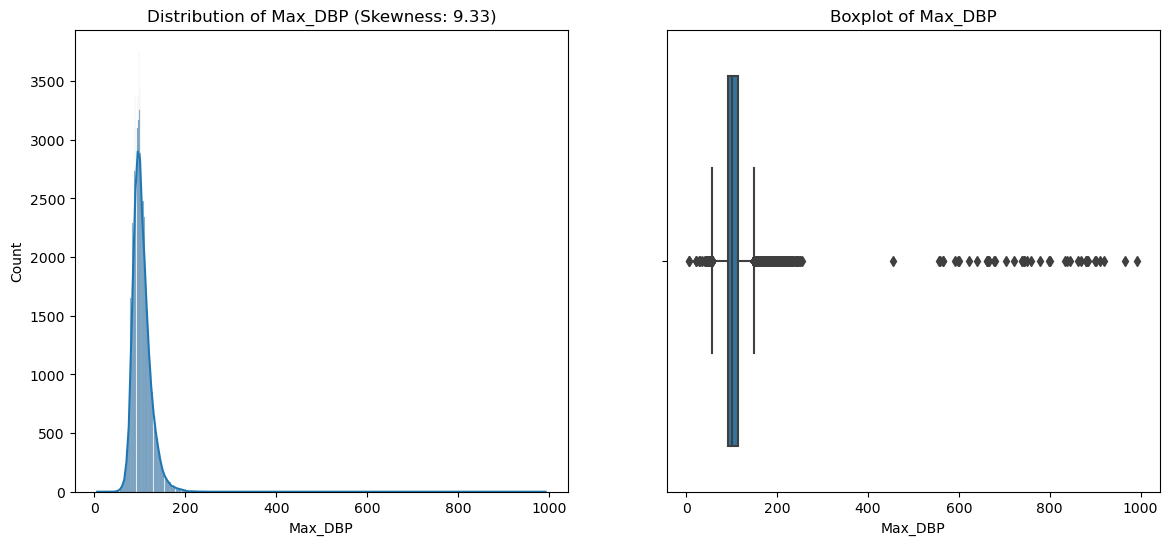

Max_DBP: Distribution is skewed or has outliers. Impute missing values with median.


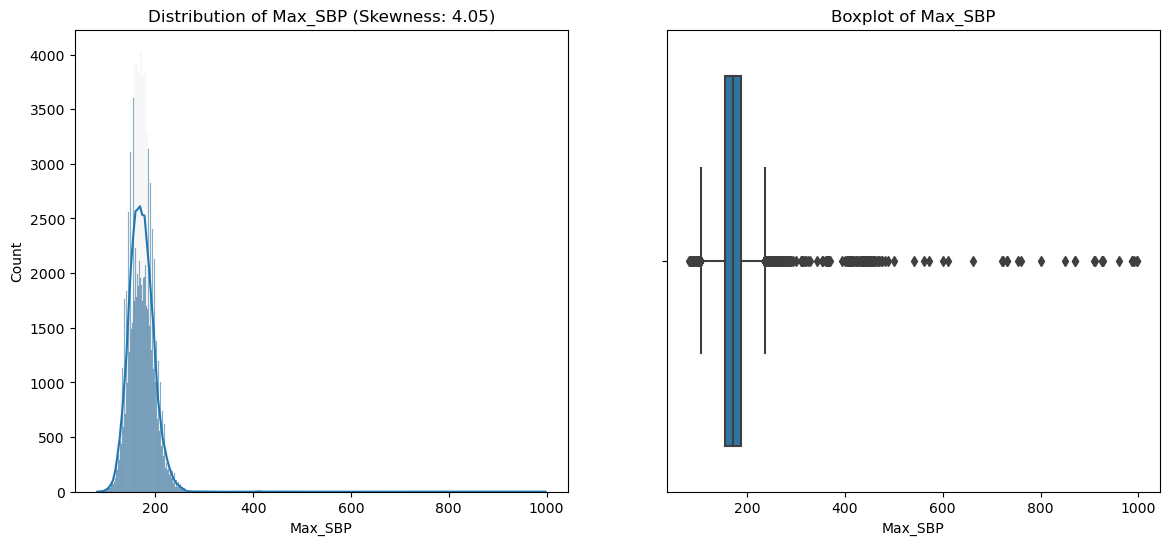

Max_SBP: Distribution is skewed or has outliers. Impute missing values with median.


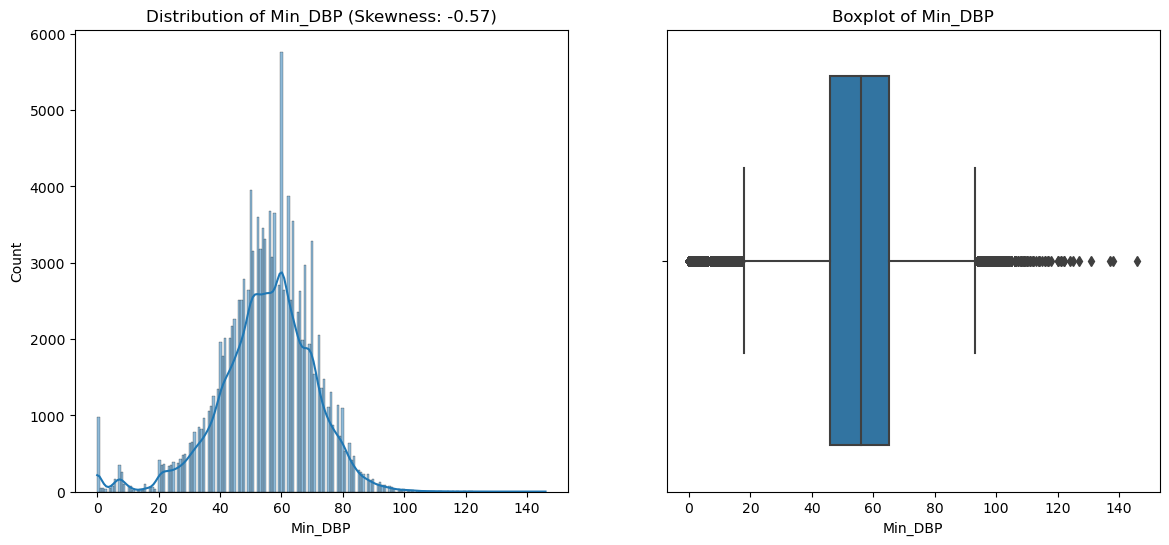

Min_DBP: Distribution is skewed or has outliers. Impute missing values with median.


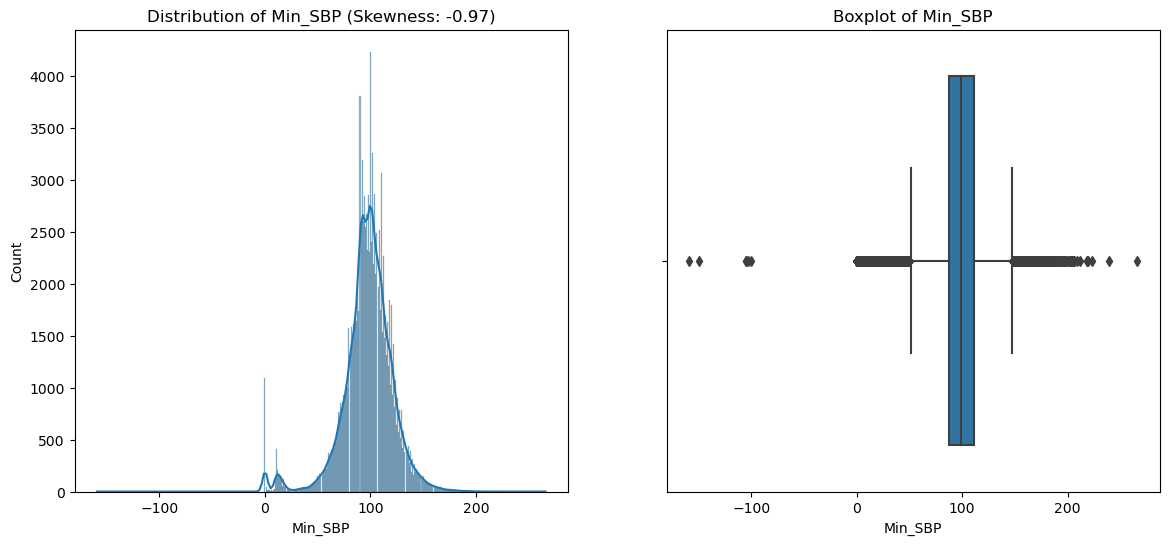

Min_SBP: Distribution is skewed or has outliers. Impute missing values with median.


In [8]:
from scipy.stats import skew

# Define the numerical columns
numerical_columns = ['Max_DBP', 'Max_SBP', 'Min_DBP', 'Min_SBP']

for column in numerical_columns:
    # Calculate the column skewness
    column_skewness = skew(data[column].dropna())
    
    # Plot the distribution and a boxplot
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column} (Skewness: {column_skewness:.2f})')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    
    # Save the plot before showing it
    plt.savefig(f'{column}_distribution_boxplot.png')
    
    
    plt.show()

    # Decide whether to use mean or median
    if abs(column_skewness) < 0.5:
        print(f"{column}: Distribution is fairly symmetric. Impute missing values with mean.")
    else:
        print(f"{column}: Distribution is skewed or has outliers. Impute missing values with median.")


# Impute missing values for the numerical features

In [9]:
# Impute missing values with median for skewed distributions or columns with outliers

data['Max_DBP'].fillna(data['Max_DBP'].median(), inplace=True)
data['Max_SBP'].fillna(data['Max_SBP'].median(), inplace=True)
data['Min_SBP'].fillna(data['Min_SBP'].median(), inplace=True)
data['Min_DBP'].fillna(data['Min_DBP'].median(), inplace=True)

In [10]:
# Check the number of missing values in each column
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation

PATID               0
Sex                 0
Race                5
Marital_Status     12
Max_DBP             0
Max_SBP             0
Min_DBP             0
Min_SBP             0
Comorbidities     494
Smoking_Status    297
Encounter Type      0
Age_Grp             0
Target              0
dtype: int64

# Mapping and Encoding Diastolic Blood Pressure (DBP), and Systolic Blood Pressure (SBP)

In [11]:
# Create SBP and DBP categories with desired labels
data['SBP_Category'] = pd.cut(data['Max_SBP'], bins=[-float('inf'), 120, 140, float('inf')], labels=['SBP <=120', 'SBP 120-140', 'SBP >=140'])
data['DBP_Category'] = pd.cut(data['Max_DBP'], bins=[-float('inf'), 80, 90, float('inf')], labels=['DBP <=80', 'DBP 80-90', 'DBP >=90'])

# One-hot encoding with the correct names
data = pd.get_dummies(data, columns=['SBP_Category', 'DBP_Category'])

# Rename the columns to match the format
data = data.rename(columns={
    'SBP_Category_SBP <=120': 'SBP below 120',
    'SBP_Category_SBP 120-140': 'SBP 120-140',
    'SBP_Category_SBP >=140': 'SBP above 140',
    'DBP_Category_DBP <=80': 'DBP below 80',
    'DBP_Category_DBP 80-90': 'DBP 80-90',
    'DBP_Category_DBP >=90': 'DBP above 90'
})

# Remove the original columns
data = data.drop(columns=['Max_SBP', 'Min_SBP', 'Max_DBP', 'Min_DBP'])

# Display the resulting dataframe
print(data.head())

# Check and print the count for each category
print("Count for each SBP category:")
print(f"SBP below 120: {data['SBP below 120'].sum()}")
print(f"SBP 120-140: {data['SBP 120-140'].sum()}")
print(f"SBP above 140: {data['SBP above 140'].sum()}")

print("\nCount for each DBP category:")
print(f"DBP below 80: {data['DBP below 80'].sum()}")
print(f"DBP 80-90: {data['DBP 80-90'].sum()}")
print(f"DBP above 90: {data['DBP above 90'].sum()}")


     PATID Sex   Race Marital_Status  \
0   578908   M  WHITE        Married   
1  2403150   M  WHITE        Married   
2   223543   F  WHITE        Widowed   
3  2981256   F  WHITE       Divorced   
4  2878598   F  WHITE        Widowed   

                                       Comorbidities  \
0  Essential (primary) hypertension,HYPERTENSION ...   
1  OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Un...   
2  Uncontrolled depression,HYPERTENSION NOS,BENIG...   
3  Vitamin D deficiency, unspecified-E55.9,OBSTRU...   
4  HYPERLIPIDEMIA NEC-NOS,CHRONIC KIDNEY DISEASE,...   

                             Smoking_Status                  Encounter Type  \
0                              Never smoker                      OUTPATIENT   
1                              Never smoker                      OUTPATIENT   
2                                       NaN  OUTPATIENT,EMERGENCY,INPATIENT   
3                              Never smoker            OUTPATIENT,INPATIENT   
4  Former smoker quit longe

In [12]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(data)) * 100

# Print the number of missing values and their percentage
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})


print(missing_data_summary)


                Missing Values  Percentage Missing
PATID                        0            0.000000
Sex                          0            0.000000
Race                         5            0.004071
Marital_Status              12            0.009771
Comorbidities              494            0.402221
Smoking_Status             297            0.241821
Encounter Type               0            0.000000
Age_Grp                      0            0.000000
Target                       0            0.000000
SBP below 120                0            0.000000
SBP 120-140                  0            0.000000
SBP above 140                0            0.000000
DBP below 80                 0            0.000000
DBP 80-90                    0            0.000000
DBP above 90                 0            0.000000


# Mapping and Encoding

# 1. Encoding 'Age' column

In [13]:
# One hot encoding on the 'Age_Grp' column
age_group_dummies = pd.get_dummies(data['Age_Grp'], prefix='Age_Grp')

# Concatenate the original DataFrame with the new one hot encoded columns
data = pd.concat([data, age_group_dummies], axis=1)

In [14]:
data.head()

,PATID,Sex,Race,Marital_Status,Comorbidities,Smoking_Status,Encounter Type,Age_Grp,Target,SBP below 120,SBP 120-140,SBP above 140,DBP below 80,DBP 80-90,DBP above 90,Age_Grp_50-60,Age_Grp_60-70,Age_Grp_70-80,Age_Grp_80-90,Age_Grp_90-100
0,578908,M,WHITE,Married,"Essential (primary) hypertension,HYPERTENSION ...",Never smoker,OUTPATIENT,80-90,1,0,0,1,1,0,0,0,0,0,1,0
1,2403150,M,WHITE,Married,"OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Un...",Never smoker,OUTPATIENT,70-80,1,0,0,1,0,0,1,0,0,1,0,0
2,223543,F,WHITE,Widowed,"Uncontrolled depression,HYPERTENSION NOS,BENIG...",NaN,"OUTPATIENT,EMERGENCY,INPATIENT",80-90,1,0,0,1,0,0,1,0,0,0,1,0
3,2981256,F,WHITE,Divorced,"Vitamin D deficiency, unspecified-E55.9,OBSTRU...",Never smoker,"OUTPATIENT,INPATIENT",80-90,1,0,0,1,0,0,1,0,0,0,1,0
4,2878598,F,WHITE,Widowed,"HYPERLIPIDEMIA NEC-NOS,CHRONIC KIDNEY DISEASE,...",Former smoker quit longer than 12 months,"INPATIENT,OUTPATIENT,EMERGENCY",80-90,1,0,0,1,0,0,1,0,0,0,1,0


In [15]:
# Drop the original 'Age_Group' column
data = data.drop(columns=['Age_Grp'])

# Display the DataFrame
#print("DataFrame with One Hot Encoding:")
print(data.head())
data.info()

     PATID Sex   Race Marital_Status  \
0   578908   M  WHITE        Married   
1  2403150   M  WHITE        Married   
2   223543   F  WHITE        Widowed   
3  2981256   F  WHITE       Divorced   
4  2878598   F  WHITE        Widowed   

                                       Comorbidities  \
0  Essential (primary) hypertension,HYPERTENSION ...   
1  OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Un...   
2  Uncontrolled depression,HYPERTENSION NOS,BENIG...   
3  Vitamin D deficiency, unspecified-E55.9,OBSTRU...   
4  HYPERLIPIDEMIA NEC-NOS,CHRONIC KIDNEY DISEASE,...   

                             Smoking_Status                  Encounter Type  \
0                              Never smoker                      OUTPATIENT   
1                              Never smoker                      OUTPATIENT   
2                                       NaN  OUTPATIENT,EMERGENCY,INPATIENT   
3                              Never smoker            OUTPATIENT,INPATIENT   
4  Former smoker quit longe

# 2. Imputation, Mapping and Encoding for 'Smoking_Status' column 

In [16]:
# Print initial count

initial_count = data['Smoking_Status'].value_counts(dropna=False)
print("Initial value counts for 'Smoking_Status' column:")
print(initial_count)

Initial value counts for 'Smoking_Status' column:
Never smoker                                51445
Former smoker quit longer than 12 months    35896
Current every day smoker                    31262
Current some day smoker                      1973
Former smoker quit within 12 months          1470
NaN                                           297
Light tobacco smoker                          292
Heavy tobacco smoker                          121
Smoker ###                                     62
Name: Smoking_Status, dtype: int64


In [17]:
# Impute missing values (with most frequent value) in the 'Smoking_Status' column

data['Smoking_Status'].fillna(data['Smoking_Status'].mode()[0], inplace=True)  

# Verify the changes after imputation
print("\nValue counts for 'Smoking_Status' column after imputation:")
print(data['Smoking_Status'].value_counts(dropna=False))


Value counts for 'Smoking_Status' column after imputation:
Never smoker                                51742
Former smoker quit longer than 12 months    35896
Current every day smoker                    31262
Current some day smoker                      1973
Former smoker quit within 12 months          1470
Light tobacco smoker                          292
Heavy tobacco smoker                          121
Smoker ###                                     62
Name: Smoking_Status, dtype: int64


# Define the Mapping Function of Smoking_Status

In [18]:
# Normalize and clean the string values in 'Smoking_Status'

data['Smoking_Status'] = data['Smoking_Status'].str.replace('#', '').str.strip()

In [19]:
# Define the mapping for encoding
smoking_status_mapping = {
    'Never smoker': 0,
    'Former smoker quit longer than 12 months': 1,
    'Former smoker quit within 12 months': 1,
    'Light tobacco smoker': 1,
    'Current some day smoker': 1,
    'Current every day smoker': 1,
    'Smoker': 1,
    'Heavy tobacco smoker': 1
}

In [20]:
data['Smoking_Status'] = data['Smoking_Status'].map(smoking_status_mapping)

print(data)

          PATID Sex   Race Marital_Status  \
0        578908   M  WHITE        Married   
1       2403150   M  WHITE        Married   
2        223543   F  WHITE        Widowed   
3       2981256   F  WHITE       Divorced   
4       2878598   F  WHITE        Widowed   
...         ...  ..    ...            ...   
122813  2633300   F  WHITE       Divorced   
122814  1575030   F  WHITE        Married   
122815  2940185   M  WHITE        Married   
122816  1210750   M  WHITE         Single   
122817  2430126   M  WHITE        Married   

                                            Comorbidities  Smoking_Status  \
0       Essential (primary) hypertension,HYPERTENSION ...               0   
1       OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Un...               0   
2       Uncontrolled depression,HYPERTENSION NOS,BENIG...               0   
3       Vitamin D deficiency, unspecified-E55.9,OBSTRU...               0   
4       HYPERLIPIDEMIA NEC-NOS,CHRONIC KIDNEY DISEASE,...               1 

In [21]:
# Check the counts of each category after encoding
encoded_counts = data['Smoking_Status'].value_counts()

print(encoded_counts)

1    71076
0    51742
Name: Smoking_Status, dtype: int64


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122818 entries, 0 to 122817
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PATID           122818 non-null  int64 
 1   Sex             122818 non-null  object
 2   Race            122813 non-null  object
 3   Marital_Status  122806 non-null  object
 4   Comorbidities   122324 non-null  object
 5   Smoking_Status  122818 non-null  int64 
 6   Encounter Type  122818 non-null  object
 7   Target          122818 non-null  int64 
 8   SBP below 120   122818 non-null  uint8 
 9   SBP 120-140     122818 non-null  uint8 
 10  SBP above 140   122818 non-null  uint8 
 11  DBP below 80    122818 non-null  uint8 
 12  DBP 80-90       122818 non-null  uint8 
 13  DBP above 90    122818 non-null  uint8 
 14  Age_Grp_50-60   122818 non-null  uint8 
 15  Age_Grp_60-70   122818 non-null  uint8 
 16  Age_Grp_70-80   122818 non-null  uint8 
 17  Age_Grp_80-90   122818 non-nu

# 3. Mapping and Encoding 'Sex' column

In [23]:
# Check unique values in the 'Sex' column
unique_Sex_Status = data['Sex'].unique()
print(unique_Sex_Status)

# Verify the new columns and their unique values
print(data[['Sex']].head())
print(data['Sex'].value_counts(dropna=False)) 

['M' 'F']
  Sex
0   M
1   M
2   F
3   F
4   F
F    65935
M    56883
Name: Sex, dtype: int64


In [24]:
# Apply one-hot encoding to the 'Sex' column
data = pd.get_dummies(data, columns=['Sex'], dummy_na=False)

In [25]:
# # Verify the one-hot encoded DataFrame
# print(data.head())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122818 entries, 0 to 122817
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PATID           122818 non-null  int64 
 1   Race            122813 non-null  object
 2   Marital_Status  122806 non-null  object
 3   Comorbidities   122324 non-null  object
 4   Smoking_Status  122818 non-null  int64 
 5   Encounter Type  122818 non-null  object
 6   Target          122818 non-null  int64 
 7   SBP below 120   122818 non-null  uint8 
 8   SBP 120-140     122818 non-null  uint8 
 9   SBP above 140   122818 non-null  uint8 
 10  DBP below 80    122818 non-null  uint8 
 11  DBP 80-90       122818 non-null  uint8 
 12  DBP above 90    122818 non-null  uint8 
 13  Age_Grp_50-60   122818 non-null  uint8 
 14  Age_Grp_60-70   122818 non-null  uint8 
 15  Age_Grp_70-80   122818 non-null  uint8 
 16  Age_Grp_80-90   122818 non-null  uint8 
 17  Age_Grp_90-100  122818 non-nu

# 4. Imputation, Mapping and Encoding for 'Race' column

In [26]:
# Check unique values in the 'Race' column
print(data['Race'].value_counts(dropna=False)) 

WHITE                                      112489
BLACK OR AFRICAN AMERICAN                    7411
SOME OTHER RACE                              1124
ASIAN                                        1073
Unknown                                       457
AMERICAN INDIAN OR ALASKAN NATIVE             210
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND        49
NaN                                             5
Name: Race, dtype: int64


In [27]:
# Replace 'Unknown' with NaN
data['Race'] = data['Race'].replace('Unknown', np.nan)

# Verify the changes
print("Value counts for 'Race' column after replacing 'Unknown' with NaN:")
print(data['Race'].value_counts(dropna=False))

Value counts for 'Race' column after replacing 'Unknown' with NaN:
WHITE                                      112489
BLACK OR AFRICAN AMERICAN                    7411
SOME OTHER RACE                              1124
ASIAN                                        1073
NaN                                           462
AMERICAN INDIAN OR ALASKAN NATIVE             210
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND        49
Name: Race, dtype: int64


In [28]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(data)) * 100

# Print the number of missing values and their percentage
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

print(missing_data_summary)

                Missing Values  Percentage Missing
PATID                        0            0.000000
Race                       462            0.376166
Marital_Status              12            0.009771
Comorbidities              494            0.402221
Smoking_Status               0            0.000000
Encounter Type               0            0.000000
Target                       0            0.000000
SBP below 120                0            0.000000
SBP 120-140                  0            0.000000
SBP above 140                0            0.000000
DBP below 80                 0            0.000000
DBP 80-90                    0            0.000000
DBP above 90                 0            0.000000
Age_Grp_50-60                0            0.000000
Age_Grp_60-70                0            0.000000
Age_Grp_70-80                0            0.000000
Age_Grp_80-90                0            0.000000
Age_Grp_90-100               0            0.000000
Sex_F                        0 

In [29]:
# # Check the number of missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

PATID               0
Race              462
Marital_Status     12
Comorbidities     494
Smoking_Status      0
Encounter Type      0
Target              0
SBP below 120       0
SBP 120-140         0
SBP above 140       0
DBP below 80        0
DBP 80-90           0
DBP above 90        0
Age_Grp_50-60       0
Age_Grp_60-70       0
Age_Grp_70-80       0
Age_Grp_80-90       0
Age_Grp_90-100      0
Sex_F               0
Sex_M               0
dtype: int64


In [30]:
# Impute missing values in the 'Race' column

data['Race'].fillna(data['Race'].mode()[0], inplace=True)  # Replace with most frequent value

# Verify the changes after imputation
print("\nValue counts for 'Race' column after imputation:")
print(data['Race'].value_counts(dropna=False))


Value counts for 'Race' column after imputation:
WHITE                                      112951
BLACK OR AFRICAN AMERICAN                    7411
SOME OTHER RACE                              1124
ASIAN                                        1073
AMERICAN INDIAN OR ALASKAN NATIVE             210
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND        49
Name: Race, dtype: int64


# Define the Mapping Function for 'Race'

In [31]:
# Normalize and clean the string and Define the mapping function for 'Race'
# Treat any other unknown or unexpected values as Unknown

def map_race(status):
    status = status.lower().strip()  # Normalize and clean the string
    
    if status in ['white', 
                  'black or african american', 
                  'some other race',
                  'asian', 
                  'american indian or alaskan native', 
                  'native hawaiian or other pacific island']:
        return status
    else:
        return 'unknown'  # Treat any other unknown or unexpected values as Unknown

# Apply the updated function to the 'Race' column
data['Race_Grouped'] = data['Race'].apply(map_race)

# Verify the changes
print(data['Race_Grouped'].value_counts(dropna=False))

# One-hot encoding on the 'Race_Grouped' column
data = pd.get_dummies(data, columns=['Race_Grouped'], prefix='Race')

white                                      112951
black or african american                    7411
some other race                              1124
asian                                        1073
american indian or alaskan native             210
native hawaiian or other pacific island        49
Name: Race_Grouped, dtype: int64


In [32]:
# Check the unique values and their counts in the 'Race' column after mapping
race_counts = data.filter(like='Race_').sum()
print(race_counts)

# Display the dataframe to verify encoding
print(data.head())


Race_american indian or alaskan native             210
Race_asian                                        1073
Race_black or african american                    7411
Race_native hawaiian or other pacific island        49
Race_some other race                              1124
Race_white                                      112951
dtype: int64
     PATID   Race Marital_Status  \
0   578908  WHITE        Married   
1  2403150  WHITE        Married   
2   223543  WHITE        Widowed   
3  2981256  WHITE       Divorced   
4  2878598  WHITE        Widowed   

                                       Comorbidities  Smoking_Status  \
0  Essential (primary) hypertension,HYPERTENSION ...               0   
1  OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Un...               0   
2  Uncontrolled depression,HYPERTENSION NOS,BENIG...               0   
3  Vitamin D deficiency, unspecified-E55.9,OBSTRU...               0   
4  HYPERLIPIDEMIA NEC-NOS,CHRONIC KIDNEY DISEASE,...               1   

       

In [33]:
# Dictionary mapping old column names to new column names

new_column_names = {
    'Race_american indian or alaskan native': 'AMERICAN_IND/ALASKAN',
    'ace_asian': 'ASIAN',
    'Race_black or african american': 'BLACK/AFRIC_AMERICAN',
    'Race_native hawaiian or other pacific island': 'NAT_HAWAIIN',
    'Race_some other race': 'OTHER',
    'Race_white': 'WHITE',
}

# Rename the columns using the rename method
data.rename(columns=new_column_names, inplace=True)

# Drop the original 'Race' column as it has been encoded
data = data.drop(columns=['Race'], errors='ignore')

# Verify the changes
#print(data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122818 entries, 0 to 122817
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 122818 non-null  int64 
 1   Marital_Status        122806 non-null  object
 2   Comorbidities         122324 non-null  object
 3   Smoking_Status        122818 non-null  int64 
 4   Encounter Type        122818 non-null  object
 5   Target                122818 non-null  int64 
 6   SBP below 120         122818 non-null  uint8 
 7   SBP 120-140           122818 non-null  uint8 
 8   SBP above 140         122818 non-null  uint8 
 9   DBP below 80          122818 non-null  uint8 
 10  DBP 80-90             122818 non-null  uint8 
 11  DBP above 90          122818 non-null  uint8 
 12  Age_Grp_50-60         122818 non-null  uint8 
 13  Age_Grp_60-70         122818 non-null  uint8 
 14  Age_Grp_70-80         122818 non-null  uint8 
 15  Age_Grp_80-90    

# 5. Imputation, Mapping and Encoding 'Marital_Status' column

In [34]:
# Check unique values in the 'Marital_Status' column
unique_Marital_Status = data['Marital_Status'].unique()
print(unique_Marital_Status)

# Verify the unique values
print(data['Marital_Status'].value_counts(dropna=False)) 

['Married' 'Widowed' 'Divorced' 'Single' 'Unknown' 'Separated' nan
 'Life Partner']
Married         70428
Single          20895
Divorced        15008
Widowed         13393
Unknown          1509
Separated        1494
Life Partner       79
NaN                12
Name: Marital_Status, dtype: int64


In [35]:
# Replace 'Unknown' with NaN in the 'Marital_Status' column
data['Marital_Status'] = data['Marital_Status'].replace('Unknown', np.nan)

# Verify the changes
print("Value counts for 'Marital_Status' column after replacing 'Unknown' with NaN:")
print(data['Marital_Status'].value_counts(dropna=False))

Value counts for 'Marital_Status' column after replacing 'Unknown' with NaN:
Married         70428
Single          20895
Divorced        15008
Widowed         13393
NaN              1521
Separated        1494
Life Partner       79
Name: Marital_Status, dtype: int64


In [36]:
# Impute missing values in the 'Marital_Status' column

mode_value = data['Marital_Status'].mode()[0]
data['Marital_Status'].fillna(mode_value, inplace=True)

# Verify the changes after imputation
print("\nValue counts for 'Marital_Status' column after imputation:")
print(data['Marital_Status'].value_counts(dropna=False))

# Perform one-hot encoding on the 'Marital_Status' column
data = pd.get_dummies(data, columns=['Marital_Status'], prefix='Marital_Status')


Value counts for 'Marital_Status' column after imputation:
Married         71949
Single          20895
Divorced        15008
Widowed         13393
Separated        1494
Life Partner       79
Name: Marital_Status, dtype: int64


In [37]:
# Display the dataframe to verify encoding

print(data.head())
data.info()

     PATID                                      Comorbidities  Smoking_Status  \
0   578908  Essential (primary) hypertension,HYPERTENSION ...               0   
1  2403150  OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Un...               0   
2   223543  Uncontrolled depression,HYPERTENSION NOS,BENIG...               0   
3  2981256  Vitamin D deficiency, unspecified-E55.9,OBSTRU...               0   
4  2878598  HYPERLIPIDEMIA NEC-NOS,CHRONIC KIDNEY DISEASE,...               1   

                   Encounter Type  Target  SBP below 120  SBP 120-140  \
0                      OUTPATIENT       1              0            0   
1                      OUTPATIENT       1              0            0   
2  OUTPATIENT,EMERGENCY,INPATIENT       1              0            0   
3            OUTPATIENT,INPATIENT       1              0            0   
4  INPATIENT,OUTPATIENT,EMERGENCY       1              0            0   

   SBP above 140  DBP below 80  DBP 80-90  ...  BLACK/AFRIC_AMERICAN  \
0 

In [38]:
# One-hot encoding created new columns for each marital status value. We'll use a dictionary to map old column names to the new ones.

new_column_names = {
    'Marital_Status_Divorced': 'Divorced',
    'Marital_Status_Life Partner': 'Life Partner',
    'Marital_Status_Married': 'Married',
    'Marital_Status_Separated': 'Separated',
    'Marital_Status_Single': 'Single',
    'Marital_Status_Widowed': 'Widowed'
}

# Rename the columns using the rename method
data.rename(columns=new_column_names, inplace=True)


# Verify the changes
print(data.columns)
data.info()

Index(['PATID', 'Comorbidities', 'Smoking_Status', 'Encounter Type', 'Target',
       'SBP below 120', 'SBP 120-140', 'SBP above 140', 'DBP below 80',
       'DBP 80-90', 'DBP above 90', 'Age_Grp_50-60', 'Age_Grp_60-70',
       'Age_Grp_70-80', 'Age_Grp_80-90', 'Age_Grp_90-100', 'Sex_F', 'Sex_M',
       'AMERICAN_IND/ALASKAN', 'Race_asian', 'BLACK/AFRIC_AMERICAN',
       'NAT_HAWAIIN', 'OTHER', 'WHITE', 'Divorced', 'Life Partner', 'Married',
       'Separated', 'Single', 'Widowed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122818 entries, 0 to 122817
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 122818 non-null  int64 
 1   Comorbidities         122324 non-null  object
 2   Smoking_Status        122818 non-null  int64 
 3   Encounter Type        122818 non-null  object
 4   Target                122818 non-null  int64 
 5   SBP below 120    

# 6. Mapping and Encoding 'Encounter Type' Column

In [39]:
# Display the value counts for the 'Encounter Type' column

encounter_type_counts = data['Encounter Type'].value_counts()
print("Encounter Type Counts:")
print(encounter_type_counts)

Encounter Type Counts:
OUTPATIENT                        30441
OUTPATIENT,INPATIENT              15779
INPATIENT,OUTPATIENT              12966
OUTPATIENT,EMERGENCY               9448
OUTPATIENT,EMERGENCY,INPATIENT     8840
OUTPATIENT,INPATIENT,EMERGENCY     8827
EMERGENCY,OUTPATIENT               7638
EMERGENCY,OUTPATIENT,INPATIENT     7603
INPATIENT,OUTPATIENT,EMERGENCY     7467
EMERGENCY,INPATIENT,OUTPATIENT     6465
INPATIENT,EMERGENCY,OUTPATIENT     6298
EMERGENCY,INPATIENT                 388
INPATIENT,EMERGENCY                 365
INPATIENT                           220
EMERGENCY                            73
Name: Encounter Type, dtype: int64


In [40]:
# Split the 'Encounter Type' values into separate columns
split_encounters = data['Encounter Type'].str.get_dummies(sep=',')

# Concatenate the original DataFrame with the new one hot encoded columns
data = pd.concat([data, split_encounters], axis=1)

# Drop the original 'Encounter Type' column
data = data.drop(columns=['Encounter Type'])

# Display the updated DataFrame
print("Updated DataFrame with One Hot Encoding for 'Encounter Type':")
print(data.head())


Updated DataFrame with One Hot Encoding for 'Encounter Type':
     PATID                                      Comorbidities  Smoking_Status  \
0   578908  Essential (primary) hypertension,HYPERTENSION ...               0   
1  2403150  OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Un...               0   
2   223543  Uncontrolled depression,HYPERTENSION NOS,BENIG...               0   
3  2981256  Vitamin D deficiency, unspecified-E55.9,OBSTRU...               0   
4  2878598  HYPERLIPIDEMIA NEC-NOS,CHRONIC KIDNEY DISEASE,...               1   

   Target  SBP below 120  SBP 120-140  SBP above 140  DBP below 80  DBP 80-90  \
0       1              0            0              1             1          0   
1       1              0            0              1             0          0   
2       1              0            0              1             0          0   
3       1              0            0              1             0          0   
4       1              0            0         

In [41]:
# Display the new one hot encoded columns
encoded_columns = split_encounters.columns
print("One Hot Encoded Columns for 'Encounter Type':")
print(data[encoded_columns].head())

data.info()

One Hot Encoded Columns for 'Encounter Type':
   EMERGENCY  INPATIENT  OUTPATIENT
0          0          0           1
1          0          0           1
2          1          1           1
3          0          1           1
4          1          1           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122818 entries, 0 to 122817
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 122818 non-null  int64 
 1   Comorbidities         122324 non-null  object
 2   Smoking_Status        122818 non-null  int64 
 3   Target                122818 non-null  int64 
 4   SBP below 120         122818 non-null  uint8 
 5   SBP 120-140           122818 non-null  uint8 
 6   SBP above 140         122818 non-null  uint8 
 7   DBP below 80          122818 non-null  uint8 
 8   DBP 80-90             122818 non-null  uint8 
 9   DBP above 90          122818 non-null  uint8 
 10  Age_Grp_50

# Rename the columns 'EMERGENCY' to 'EcType_ED', 'INPATIENT' to 'EcType_IP', and 'OUTPATIENT' to 'EcType_AV'

In [42]:
# Rename the specified columns
data = data.rename(columns={
    'EMERGENCY': 'EcType_ED',
    'INPATIENT': 'EcType_IP',
    'OUTPATIENT': 'EcType_AV'
})

# Display the DataFrame info to verify the changes
print(data.info())

# Print the first few rows to check the result
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122818 entries, 0 to 122817
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 122818 non-null  int64 
 1   Comorbidities         122324 non-null  object
 2   Smoking_Status        122818 non-null  int64 
 3   Target                122818 non-null  int64 
 4   SBP below 120         122818 non-null  uint8 
 5   SBP 120-140           122818 non-null  uint8 
 6   SBP above 140         122818 non-null  uint8 
 7   DBP below 80          122818 non-null  uint8 
 8   DBP 80-90             122818 non-null  uint8 
 9   DBP above 90          122818 non-null  uint8 
 10  Age_Grp_50-60         122818 non-null  uint8 
 11  Age_Grp_60-70         122818 non-null  uint8 
 12  Age_Grp_70-80         122818 non-null  uint8 
 13  Age_Grp_80-90         122818 non-null  uint8 
 14  Age_Grp_90-100        122818 non-null  uint8 
 15  Sex_F            

# 7. Imputing, Mapping and Encoding for 'Comorbidities' Column

In [44]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

PATID                     0
Comorbidities           494
Smoking_Status            0
Target                    0
SBP below 120             0
SBP 120-140               0
SBP above 140             0
DBP below 80              0
DBP 80-90                 0
DBP above 90              0
Age_Grp_50-60             0
Age_Grp_60-70             0
Age_Grp_70-80             0
Age_Grp_80-90             0
Age_Grp_90-100            0
Sex_F                     0
Sex_M                     0
AMERICAN_IND/ALASKAN      0
Race_asian                0
BLACK/AFRIC_AMERICAN      0
NAT_HAWAIIN               0
OTHER                     0
WHITE                     0
Divorced                  0
Life Partner              0
Married                   0
Separated                 0
Single                    0
Widowed                   0
EcType_ED                 0
EcType_IP                 0
EcType_AV                 0
dtype: int64


In [45]:
# Check unique values in the 'Comorbidities' column
unique_Comorbidities = data['Comorbidities'].unique()
print(unique_Comorbidities)

# Verify the new columns and their unique values
#print(data[['Comorbidities']].head())
print(data['Comorbidities'].value_counts(dropna=False)) 

['Essential (primary) hypertension,HYPERTENSION NOS,HYPERLIPIDEMIA NEC-NOS,Hyperlipidemia, unspecified,BENIGN HYPERTENSION,BENIGN HYPERTENSION,HYPERLIPIDEMIA NEC-NOS'
 'OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Unspecified dementia, unspecified severity, without behavioral disturbance, psychotic disturbance, mood disturbance, and anxiety,OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC)'
 'Uncontrolled depression,HYPERTENSION NOS,BENIGN HYPERTENSION,ANXIETY STATE NOS,DEPRESSIVE DISORDER NEC,HYPERTENSION NOS,Essential (primary) hypertension,BENIGN HYPERTENSION,Type 2 diabetes mellitus with diabetic polyneuropathy,DEPRESSIVE DISORDER NEC,DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,DEPRESSIVE DISORDER NEC,DEPRESSIVE DISORDER NEC,DEPRESSIVE DISORDER NEC,BENIGN HYPERTENSION,Unspecified anxiety disorder,HYPERTENSION NOS,SENILE DEMENTIA UNCOMP,ANXIETY STATE NOS,DEPRESSIVE DISORDER NEC,SENILE DEMENTIA UNCOMP,Uncontrolled depression,ANXIETY STATE NOS,Esse

In [46]:
# List of specific diseases we want to encode
diseases_to_encode = [
    'Diabetes', 'Type 2 Diabetes Mellitus', 'Epilepsy', 'Depression', 'Obesity', 'Stroke', 'Anxiety', 'Hypertension',
    'Hyperlipidemia', 'Cardiovascular Disease', 'Sleep Disorder', 'Headache', 'Periodontitis', 'Concussion',
    'Heart Disease', 'Sleep Apnea', 'Insomnia', 'Kidney Disease', 'Cholesterol', 'Vitamin D Deficiency',
    'Enlarge Prostate', 'Osteoporosis', 'Bone Disease', 'Depressive Disorder'
]

# Define the function to create a new column for each disease
def map_comorbidities(comorbidities, disease):
    if pd.isna(comorbidities):
        return 0
    return 1 if disease.lower() in comorbidities.lower() else 0

# Create new columns for each disease
for disease in diseases_to_encode:
    data[disease.replace(' ', '_')] = data['Comorbidities'].apply(lambda x: map_comorbidities(x, disease))

In [47]:
# Check the count of each newly created disease column
for disease in diseases_to_encode:
    column_name = disease.replace(' ', '_')
    count = data[column_name].sum()
    print(f"Count of {disease}: {count}")

Count of Diabetes: 12580
Count of Type 2 Diabetes Mellitus: 11580
Count of Epilepsy: 5600
Count of Depression: 16699
Count of Obesity: 34220
Count of Stroke: 2674
Count of Anxiety: 39972
Count of Hypertension: 92004
Count of Hyperlipidemia: 62415
Count of Cardiovascular Disease: 2550
Count of Sleep Disorder: 2415
Count of Headache: 29900
Count of Periodontitis: 1052
Count of Concussion: 2853
Count of Heart Disease: 24096
Count of Sleep Apnea: 27316
Count of Insomnia: 17875
Count of Kidney Disease: 16988
Count of Cholesterol: 0
Count of Vitamin D Deficiency: 14642
Count of Enlarge Prostate: 0
Count of Osteoporosis: 0
Count of Bone Disease: 8
Count of Depressive Disorder: 38079


In [48]:
# Display the  dataframe to verify encoding
print(data.head())
data.info()

     PATID                                      Comorbidities  Smoking_Status  \
0   578908  Essential (primary) hypertension,HYPERTENSION ...               0   
1  2403150  OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Un...               0   
2   223543  Uncontrolled depression,HYPERTENSION NOS,BENIG...               0   
3  2981256  Vitamin D deficiency, unspecified-E55.9,OBSTRU...               0   
4  2878598  HYPERLIPIDEMIA NEC-NOS,CHRONIC KIDNEY DISEASE,...               1   

   Target  SBP below 120  SBP 120-140  SBP above 140  DBP below 80  DBP 80-90  \
0       1              0            0              1             1          0   
1       1              0            0              1             0          0   
2       1              0            0              1             0          0   
3       1              0            0              1             0          0   
4       1              0            0              1             0          0   

   DBP above 90  ...  Hear

In [49]:
# Verify the changes
print(data.head())

# Drop the original 'Comorbidities'and 'Osteoporosis' column after encoding
data.drop(columns=['Comorbidities', 'Osteoporosis'], inplace=True)

# Display the dataframe
print(data.head())
data.info()

     PATID                                      Comorbidities  Smoking_Status  \
0   578908  Essential (primary) hypertension,HYPERTENSION ...               0   
1  2403150  OBSTRUCTIVE SLEEP APNEA (ADULT) (PEDIATRIC),Un...               0   
2   223543  Uncontrolled depression,HYPERTENSION NOS,BENIG...               0   
3  2981256  Vitamin D deficiency, unspecified-E55.9,OBSTRU...               0   
4  2878598  HYPERLIPIDEMIA NEC-NOS,CHRONIC KIDNEY DISEASE,...               1   

   Target  SBP below 120  SBP 120-140  SBP above 140  DBP below 80  DBP 80-90  \
0       1              0            0              1             1          0   
1       1              0            0              1             0          0   
2       1              0            0              1             0          0   
3       1              0            0              1             0          0   
4       1              0            0              1             0          0   

   DBP above 90  ...  Hear

In [50]:
# Move the 'Targer' column to the end
target_col = data.pop('Target')
data['Target'] = target_col

# Print the DataFrame info to verify the changes
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122818 entries, 0 to 122817
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   PATID                     122818 non-null  int64
 1   Smoking_Status            122818 non-null  int64
 2   SBP below 120             122818 non-null  uint8
 3   SBP 120-140               122818 non-null  uint8
 4   SBP above 140             122818 non-null  uint8
 5   DBP below 80              122818 non-null  uint8
 6   DBP 80-90                 122818 non-null  uint8
 7   DBP above 90              122818 non-null  uint8
 8   Age_Grp_50-60             122818 non-null  uint8
 9   Age_Grp_60-70             122818 non-null  uint8
 10  Age_Grp_70-80             122818 non-null  uint8
 11  Age_Grp_80-90             122818 non-null  uint8
 12  Age_Grp_90-100            122818 non-null  uint8
 13  Sex_F                     122818 non-null  uint8
 14  Sex_M               

In [51]:
# # Check the number of missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

PATID                       0
Smoking_Status              0
SBP below 120               0
SBP 120-140                 0
SBP above 140               0
DBP below 80                0
DBP 80-90                   0
DBP above 90                0
Age_Grp_50-60               0
Age_Grp_60-70               0
Age_Grp_70-80               0
Age_Grp_80-90               0
Age_Grp_90-100              0
Sex_F                       0
Sex_M                       0
AMERICAN_IND/ALASKAN        0
Race_asian                  0
BLACK/AFRIC_AMERICAN        0
NAT_HAWAIIN                 0
OTHER                       0
WHITE                       0
Divorced                    0
Life Partner                0
Married                     0
Separated                   0
Single                      0
Widowed                     0
EcType_ED                   0
EcType_IP                   0
EcType_AV                   0
Diabetes                    0
Type_2_Diabetes_Mellitus    0
Epilepsy                    0
Depression

# Save the Preprocessing DataFrame to a CSV File

In [ ]:
# Save the DataFrame to a CSV file for ML analysis

data.to_csv('Combined_ML_2Yrs_ML_Analysis.csv', index=False)